In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.algorithms import AmplificationProblem
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover
import math
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [3]:
# Please run this cell before trying out Grover's algorithm.

# This cell contains helper functions for Grover's algorithm. These functions use Qiskit's libraries to implement Grover's algorithm.
# Don't worry about these functions on first pass, but make sure you run this cell!!

def create_grover_problem(n_choices,correct):
    n = int(math.log(n_choices,2))
    ls = []
    for i in range(2**n, 2**(n+1)):
        ls.append(str((bin(i)[3:])))
    good_state = ls[correct]
    oracle = Statevector.from_label(good_state)
    problem = AmplificationProblem(oracle, is_good_state=[good_state])
    return problem

def solve_grover_problem(problem):
    backend = Aer.get_backend('qasm_simulator')
    grover = Grover(quantum_instance=backend)
    result = grover.amplify(problem)
    return result

# Linear search

Linear search is a classical algorithm for searching through an unstructured (unsorted) dataset. As described in the lecture, in linear search, we look at each element in the dataset one-by-one until we find the element we are looking for. In the challenges below, you will implement a linear search algorithm and analyze its complexity.

In [6]:
# Challenge 1 - Implement a linear search algorithm to find "Choice 13" in the list of choices given below. Print the position (index) in the list at which "Choice 13" was found.
# Use a loop to step through list_numbers, and compare each element with what you are searching for
# If the element does not match, move to the next element
# If it matches, the search is over
list_choices = ["Choice 0", "Choice 1", "Choice 2","Choice 3","Choice 4","Choice 5","Choice 6","Choice 7","Choice 8","Choice 9","Choice 10","Choice 11","Choice 12","Choice 13","Choice 14","Choice 15"]
searches = None
for ind in range(len(list_choices)):
    if list_choices[ind] == "Choice 13":
        print(ind)
        searches = ind + 1
        break

13


# Number of queries

In [7]:
# Challenge 2 - Use your implementation of linear search to find out how many queries (search or comparison operations) it took to find the Choice 13 in this list.
print(searches)

14


# Big-O notation

The number of queries it takes to find the location of the search item in a dataset captures the *complexity* of the search algorithm. In general, the complexity of an algorithm is related to the number of operations it takes to execute it, for an input of size $N$.

The **Big-O notation** is used to express the computational complexity of algorithms. It is the worst-case number of operations required by the algorithm. 

What is the worst case for linear search? How many queries would be required in this case?

Linear search has a complexity of $O(N)$, meaning that in the worst case, $N$ queries are required for an input dataset of size $N$. This is why this search technique is called linear search! Do you know any other search algorithms and their complexities?

# Grover search

Now, we will try to find Choice 13 using Grover's search algorithm. The code below uses Qiskit's built-in Grover class to implement Grover's search algorithm. You do not need to make any additions to this code - just try running it and let your TA know what you get!

In [8]:
n_choices= 16 # The total number of choices available
correct = 13 # The choice number we are searching for

# Define grover problem function
problem = create_grover_problem(n_choices, correct)

# Solve grover
result = solve_grover_problem(problem)

print('Success! Choice', correct, "has been found" if result.oracle_evaluation else 'Failure!')
print('It was found at position' , int(result.top_measurement,2)+1)

Success! Choice 13 has been found
It was found at position 14


# Number of queries for Grover search

In [9]:
# This code uses a built-in function in the Grover class to find the optimal number of queries in Grover's search.
optimal_queries = Grover.optimal_num_iterations(num_solutions=1, num_qubits=4)
print('The optimal number of queries is', optimal_queries)

The optimal number of queries is 3


Is the optimal number of queries greater than or less than the worst-case number of queries for linear search?

Why do you think there is an **optimal** number of queries for Grover search? What happens if the number of queries is not optimal?

As we discussed in the lecture, Grover's algorithm works by amplifying the amplitude of the search item in the dataset and reducing the amplitude of all the other states. The optimal number of queries corresponds to the number of iterations of the algorithms that maximize the probability of measuring the search item. If the number of iterations is lower (or higher), the probability of measuring the search item will be lower too.

This optimal number of iterations depends on the size of the dataset, as we will see in a few minutes.

# Big-O complexity of Grover's search algorithm

We saw that the complexity of linear search can be expressed as $O(N)$. Grover's search has a complexity of $O(\sqrt{N})$, meaning that the optimal number of queries scale as the square root of the size of the dataset. 

# Seeing quantum advantage: Plotting number of queries

Let's make a plot of the complexities for linear search and Grover search.

For linear search, for a database of size $N$, the worst-case number of queries is given by $N$. This occurs in the case that the element you are looking for is the last element in the database.

For Grover search, for a database of size $N$, the worst-case number of queries is approximately given by $\frac{\pi}{4}\sqrt{N}$. We won't worry about how this number is calculated for now - let's focus on how this compares with linear search.

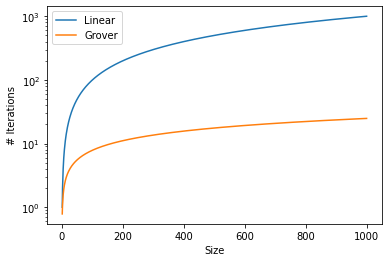

In [29]:
# Challenge 3- Write code to plot the worst case number of queries for linear and Grover search using the matplotlib library (already imported)
# For what size of database does Grover search offer 10 times fewer searches? What about 100 times?
N = np.arange(1, 1000)
plt.semilogy(N, N, label = "Linear")
plt.semilogy(N, np.pi/4 * np.sqrt(N), label = "Grover")
plt.xlabel("Size")
plt.ylabel("# Iterations")
plt.legend()

# Exploring Grover's algorithm further.

Let's see amplitude amplification in action! The code below uses Qiskit's Grover class to solve the same search problem as above. Don't worry about all the details of this code - to start off, there are three lines here that we encourage you to play around with.

Run this code and let your TA know what you see!

Grover's algorithm in Qiskit works best when the number of choices is a power of 2. Please make sure that n_choices in the code below is a power of 2!

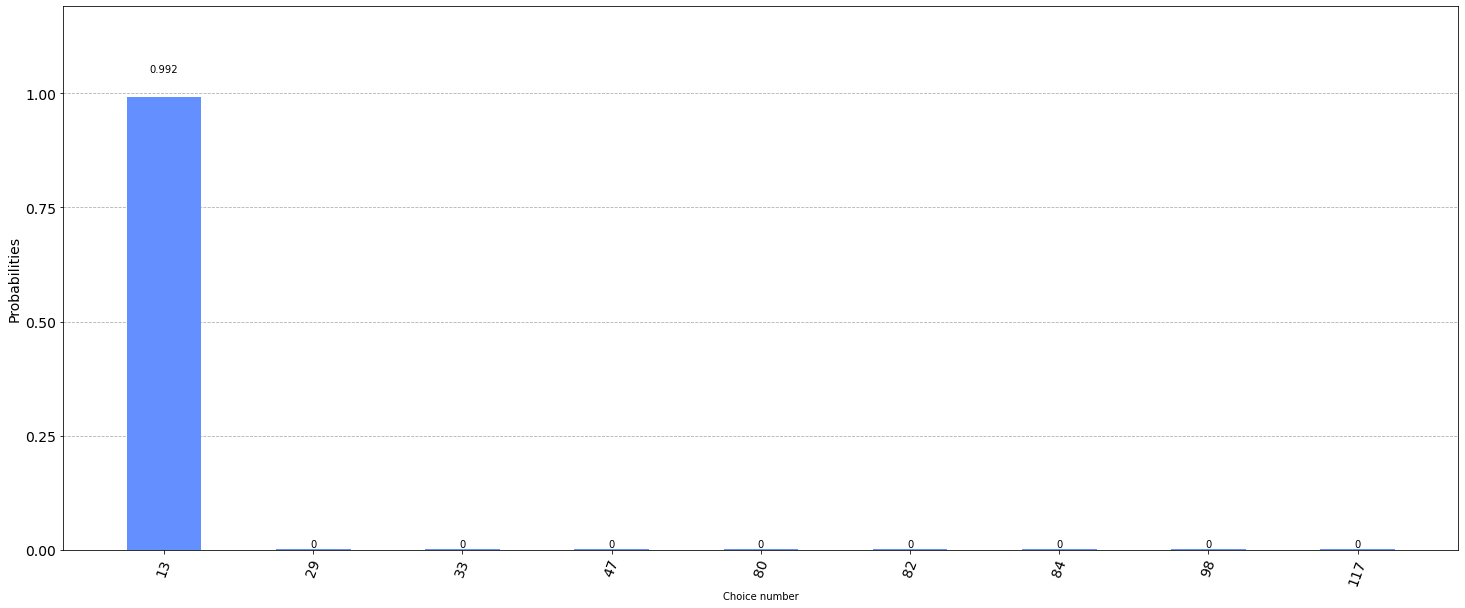

In [39]:
# This code takes the number of choices and the correct choice, and uses Grover's algorithm to find its location.

n_choices= 128 # Total number of choices - please ensure that this number is a power of 2.
correct = 13 # Choice number you are searching for

#Creating a binary representation for the choices
n = int(math.log(n_choices,2))
ls = []
for i in range(2**n, 2**(n+1)):
    ls.append(str((bin(i)[3:])))

# Defining the grover problem using the AmplificationProblem class
good_state = ls[correct]
oracle = Statevector.from_label(good_state)
problem = AmplificationProblem(oracle, is_good_state=[good_state])

# Solving the Grover problem using the Grover class
backend = Aer.get_backend('qasm_simulator')
grover = Grover(iterations=8, quantum_instance=backend) # Change number of iterations here
result = grover.amplify(problem)

# Extracting probabilities from the result of solving Grover
counts = result.circuit_results[0]
counts = counts.int_outcomes()

#Plotting probabilities
plot = plot_histogram(counts,figsize=(25, 10))
ax = plot.gca()
xticks = []
ax.set_xlabel("Choice number")
display(plot)

Now, try playing around with the code in the cell above by answering these challenges:
### Challenge 4 - Increase the number of iterations in the indicated line (it is set to 0 currently). What do you notice? What is the optimal number of iterations in this case?

### Challenge 5 - Try changing the number of choices in the indicated line to 32. What is the optimal number of queries in this case? What about 128?